# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file)

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table.
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
student_data = pd.DataFrame({"age": [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], "tardies": [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
#student_data

Draw a dispersion diagram (scatter plot) for the data.

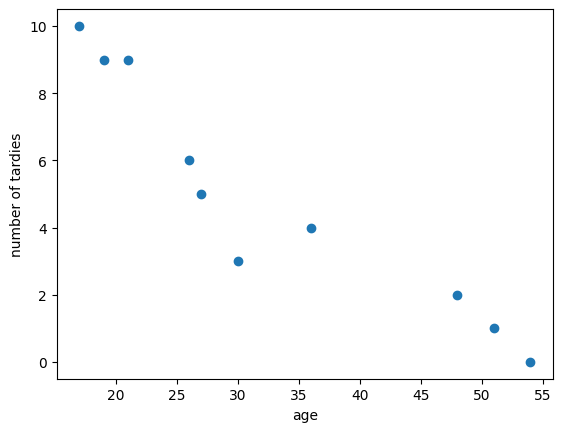

In [ ]:
plt.scatter(x = student_data["age"], y = student_data["tardies"])
plt.xlabel("age")
plt.ylabel("number of tardies")
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# just visually I would say that there is a strong negative relationship between age and number of tardies. Let's see:

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [ ]:
#correlation:
corr_p = pearsonr(student_data["age"], student_data["tardies"])[0]
corr_s = spearmanr(student_data["age"], student_data["tardies"])[0]
print("pearson: ", corr_p)
print("spearman: ", corr_s)

#covariance:
cov = student_data["age"].cov(student_data["tardies"])
print("covariance: ", cov)

pearson:  -0.9391626886887121
spearman:  -0.9848069807617047
covariance:  -45.56666666666666


In [ ]:
"""  First, according to pearson and spearman's correlation, it actually confirms my hypothese.
And this negative covariance suggests the exact same thing: that as one variable increases (age),
 the other tends to decrease (number of tardies), and vice versa."""

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Gonna use the SAT's example from class. Age is our independent variable (what we will use to predict number of tardies)
# number of tardies is the dependent variable (what we want to predict)

x = student_data[["age"]]
y = student_data["tardies"]

model = LinearRegression()
model.fit(x,y)

slope = model.coef_
interception = model.intercept_

print(f"Slope of our reg line is {slope} \n and the Y-intercept is {interception}")

Slope of our reg line is [-0.24282077] 
 and the Y-intercept is 12.888803363135771


In [ ]:
# not sure about this, but going to use the SAT's example from class,
# add new observations to the dataframe to test the prediction model
new_ages = pd.DataFrame([18, 23, 20, 38, 45, 42], columns = ["age"])
new_ages["pred_tardies"] = model.predict(new_ages)
new_ages

,age,pred_tardies
0,18,8.518029
1,23,7.303926
2,20,8.032388
3,38,3.661614
4,45,1.961869
5,42,2.690331


Plot your regression model on your scatter plot.

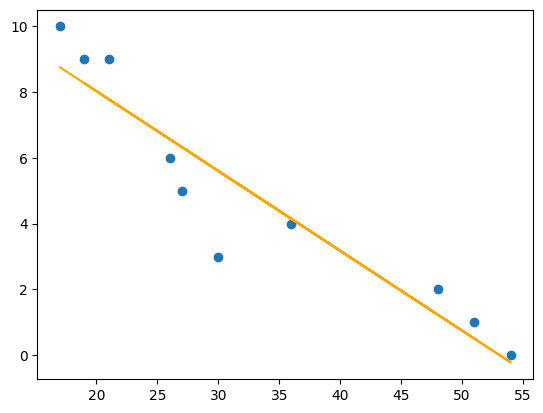

In [ ]:
reg_line = interception + slope*x  #in class, b0 + b1 * age

plt.plot(x, reg_line, c = "orange")
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
model.score(x,y)
# From the model score I can actually say that according to the sample, it's a very good predictable model, and when considering older students,
# the number of tardies will (predictably) be lower.

0.8820265558250109

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables.

In [ ]:
vehicles = pd.read_csv("/content/vehicles.csv")
vehicles

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable.

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [ ]:
selected_columns = ["Year", "Fuel Barrels/Year","Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]
cor_vehicles = vehicles[selected_columns]
correlation_matrix = cor_vehicles.corr()


sorted_selected_columns = correlation_matrix.sort_values(by ="CO2 Emission Grams/Mile", ascending = False)
sorted_selected_columns

In [ ]:
""" Fuel barrels/year has the highest absolute correlation with our outcome variable -> 0.986, making it the most significant variable in determining
CO2 emissions. This positive and very strong correlation suggests a direct relationship between the quantity of fuel used and CO2 emissions.
The variable that has least impact is year, indicating that just by the year of the model/car we cannot associate with CO2 emissions directly.

Fuel cost/year and combined MPG also show strong correlations with CO2 emissions, and this last one shows a negative relationship saying that
as combined MPG increases, CO2 Emission decreases, and vice versa (talking about fuel efficiency)"""

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Gonna use example of ages/tardies and SAT's from class.
# "Year", "Fuel Barrels/Year","Combined MPG", "Fuel Cost/Year" are our independent variable (what we will use to predict "CO2 Emission Grams/Mile")
# "CO2 Emission Grams/Mile" is the dependent variable (what we want to predict)

x = vehicles[["Year", "Fuel Barrels/Year","Combined MPG", "Fuel Cost/Year"]]
y = vehicles["CO2 Emission Grams/Mile"]

model = LinearRegression() # type of regression being used
model.fit(x,y)

In [ ]:
# add new observations to the dataframe to test the prediction model
new_data_vehicles = pd.DataFrame({
                                "Year": [2022, 2015, 2002],
                                "Fuel Barrels/Year": [10, 15, 20],
                                "Combined MPG": [30, 25, 20],
                                "Fuel Cost/Year": [1500, 2000, 2700]})

new_data_vehicles["pred_CO2_emissions"] = model.predict(new_data_vehicles)
new_data_vehicles

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
slope = model.coef_
interception = model.intercept_

print(f"Slope of our reg line is {slope} \n and the Y-intercept is {interception}")

# This positive slope indicates a proportional relationship between the variables and CO2 emissions


Slope of our reg line is [0.84848485] 
 and the Y-intercept is -0.43939393939393945


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression.
First, build a dataframe with the data.

In [29]:
party_data = pd.DataFrame({"invited": [1, 3, 4, 6, 8, 9, 11, 14], "attended": [1, 2, 4, 4, 5, 7, 8,13]})


linear = pearsonr(party_data["invited"], party_data["attended"])[0]
linear
# i think she/he is being dramatic. Pearson supports the inverse: from this sample, more the invitations, the more attended!

0.9652303546573691

In [30]:
party_data

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [28]:
x = party_data[["invited"]]
y = party_data["attended"]

model = LinearRegression()
model.fit(x,y)
slope = model.coef_
interception = model.intercept_

In [ ]:
reg_line = interception + slope*x #(b0 + b1 * invited)

plt.plot(x, reg_line, c="orange")
plt.scatter(x,y)
plt.show()

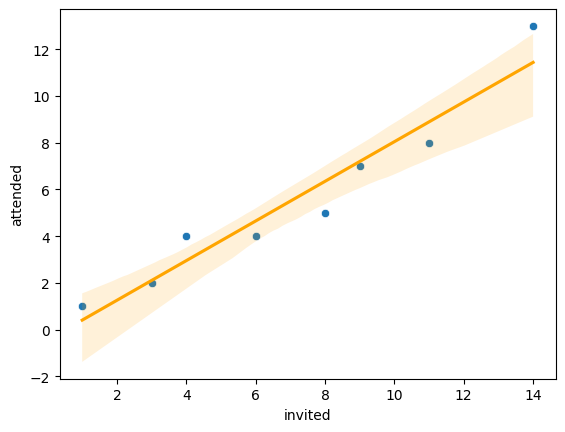

In [35]:
# also wanted to try this one
sns.scatterplot(x ="invited", y = "attended", data = party_data)
plt.xlabel("invitations")
plt.ylabel("attended")

sns.regplot(x ="invited", y = "attended", data = party_data, scatter = False, color = "orange")
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [34]:
print(f"Slope of our reg line is {slope} \n and the Y-intercept is {interception}")
# This (very) positive slope indicates a proportional relationship between the number of invites and the number of attendees.
# couldn't put Y-intercept into context ....

Slope of our reg line is [0.84848485] 
 and the Y-intercept is -0.43939393939393945


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model.

In [36]:
# With TA's Help :)
Q1 = np.quantile(party_data, 0.25)
print(f"the first quartile is {Q1}")

Q2 = np.quantile(party_data, 0.50)
print(f"the second quartile is {Q2}")

Q3 = np.quantile(party_data, 0.75)
print(f"the third quartile is {Q3}")

the first quartile is 3.75
the second quartile is 5.5
the third quartile is 8.25


In [ ]:
### to get the inter quartile range
IQR = Q3 - Q1
print("Inter quartile range is:", IQR )

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outlierd_party_data = party_data[(party_data["invited"] >= lower_bound) & (party_data["invited"] <= upper_bound)]
outlierd_party_data

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
sns.scatterplot(x ="invited", y = "attended", data = outlierd_party_data)
plt.xlabel("invitations")
plt.ylabel("attended")

sns.regplot(x ="invited", y = "attended", data = outlierd_party_data, scatter = False, color = "orange")
plt.show()

In [39]:
### No outliers here, so i think it was too much drama around the party issue :)

### Or I did something wrong, which is also very frequent #verysadtrombone